In [69]:
from astropy.io import votable
from urllib.parse import urlparse, parse_qs
import warnings
from ipyaladin import Aladin
import matplotlib.pyplot as plt
from beakerx.object import beakerx
import pandas
import seaborn as sns
import numpy as np
warnings.simplefilter('ignore')

import ipywidgets as widgets

%matplotlib inline

In [11]:
%%javascript
IPython.notebook.kernel.execute("notebook_url = '" + window.location + "'");


<IPython.core.display.Javascript object>

In [13]:
# table URL example: http://vizier.u-strasbg.fr/viz-bin/votable?-source=J%2FApJ%2F720%2F368%2Ftable5&-out.max=9999

query = urlparse(notebook_url).query
params = parse_qs(query)
table_url = params.get('table_url')
if table_url is None:
    print('table_url parameter has not been found in URL!\nEnter a table URL in text field below')
else:
    table_url = table_url[0]
    print(f'Let\'s analyze table {table_url}')
    
table_url_widget = widgets.Text(description='Table URL', value=table_url, layout=widgets.Layout(width='90%'))
table_url_widget

table_url parameter has not been found in URL!
Enter a table URL in text field below


Text(value='', description='Table URL', layout=Layout(width='90%'))

In [14]:
table_url = table_url_widget.value

In [40]:
t = votable.parse_single_table(table_url)
t

<Table masked=True length=4941>
recno  Seq   RAJ2000   DEJ2000   n_z   ...    SFR     XID  l_logLX  logLX 
               deg       deg           ... Msun / yr               [10-7W]
int32 int16  float64   float64  bytes1 ...  float32  int16  bytes1 float32
----- ----- --------- --------- ------ ... --------- ----- ------- -------
    1     1 189.37823  62.18428        ...       8.7     0       <   42.85
    2     2 189.37852  62.18563        ...       1.8     0       <   41.46
    3     3 189.38080  62.18413        ...       6.0     0       <   42.02
    4     4 189.26192  62.18623      + ...       6.0     0       <   41.03
    5     5 189.26080  62.18484      + ...       3.5     0       <   41.67
    6     6 189.22466  62.18574        ...      10.1     0       <   42.34
    7     7 189.31999  62.18565        ...      11.2     0       <   42.68
    8     8 189.24454  62.18571        ...       5.8     0       <   42.29
    9     9 189.33075  62.18554        ...       1.3     0       <  

In [22]:
df = t.to_table().to_pandas()

In [73]:
beakerx.pandas_display_table()
beakerx.getVersionNumber()


KeyError: 'BEAKERX_AUTOTRANSLATION_PORT'

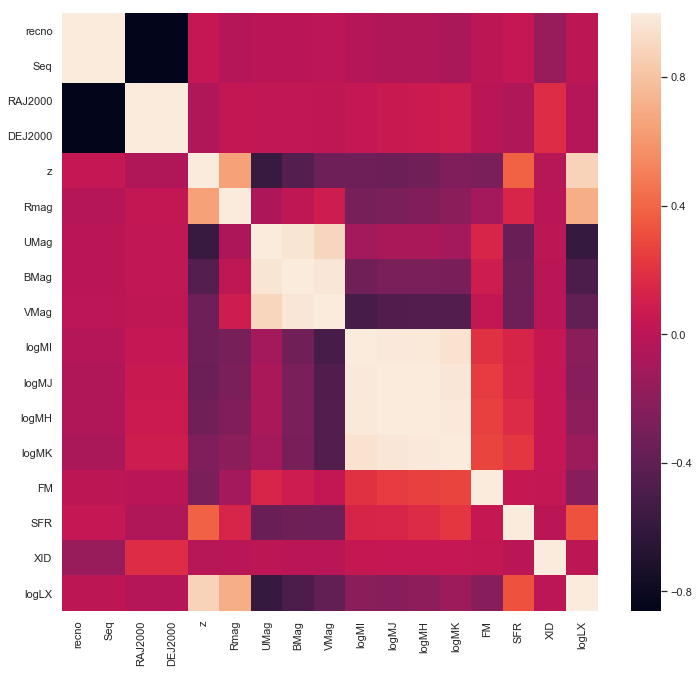

In [50]:
plt.figure(figsize=(12, 11))
sns.set()
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<Figure size 1440x720 with 0 Axes>

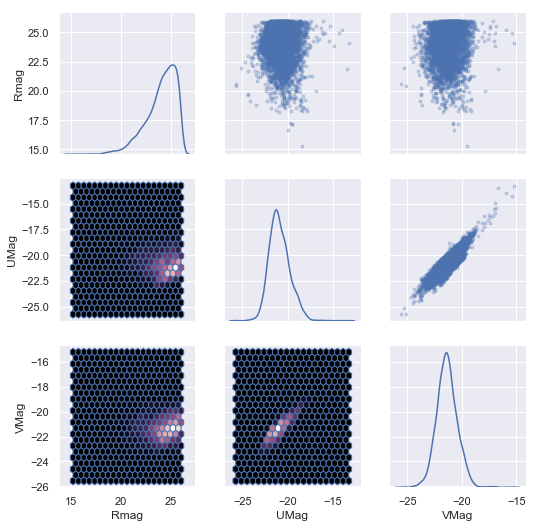

In [62]:
#g = sns.pairplot(df)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

#(df.select_dtypes(include=[np.number])
(df[['Rmag', 'UMag', 'VMag']].select_dtypes(include=[np.number])
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

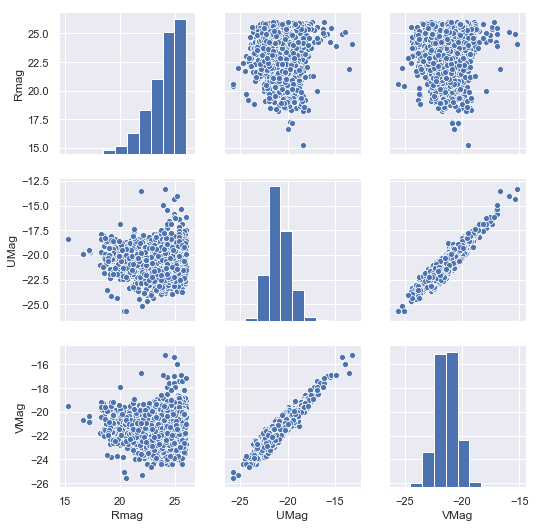

In [63]:
sns.pairplot(df[['Rmag', 'UMag', 'VMag']])

In [32]:
a = Aladin()
a

Aladin(options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'overlay_sur…

In [33]:
a.add_table(t)

AttributeError: 'Table' object has no attribute '__array__'